   **Which Debts Are Worth the Bank's Effort?**



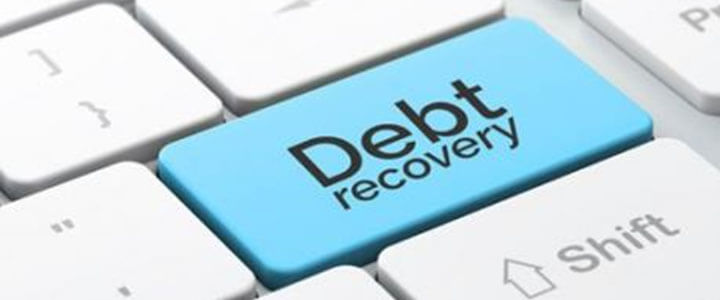


-Abirami Ragupathi



---



---



**Problem Statement**

---



---



The goal is to determine in the non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.

Regression discontinuity: banking recovery






---



---


**Data Id**


---



---



This dataset is named as bank dataset.The dataset contains a set of 1882 records and 6 attributes



---



---


**Importing Libraries**

---



---



In [76]:
import pandas as pd# linear algebra
import numpy as np# data processing
import warnings# warning filter
warnings.filterwarnings('ignore')

#ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from scipy import stats

# Import statsmodels
import statsmodels.api as sm




---




**Dataset**

---



In [77]:
data = pd.read_csv("bank_data.csv")
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male




---


**Basic Information**

---



In [78]:
data.shape

(1882, 6)

In [79]:
data.size

11292

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [81]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [82]:
data.apply(lambda x: len(x.unique()))

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64



---

**Preprocessing**


---


**Handling Missing Data**

In [83]:
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

The dataset has no missing values

---



**Exploratory Data Analysis**

---



Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

In [84]:
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  data[num]
#categoric df
BM_cat = data[cat]

print(num)
print(cat)

[data[category].value_counts() for category in cat[1:]]

['id', 'expected_recovery_amount', 'actual_recovery_amount', 'age']
['recovery_strategy', 'sex']


[Male      973
 Female    909
 Name: sex, dtype: int64]

In [85]:
summary_stats = BM_num.describe()
print(summary_stats)

                id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000  


**Histograms:**
Visualize the distribution of each numeric variable using histograms:

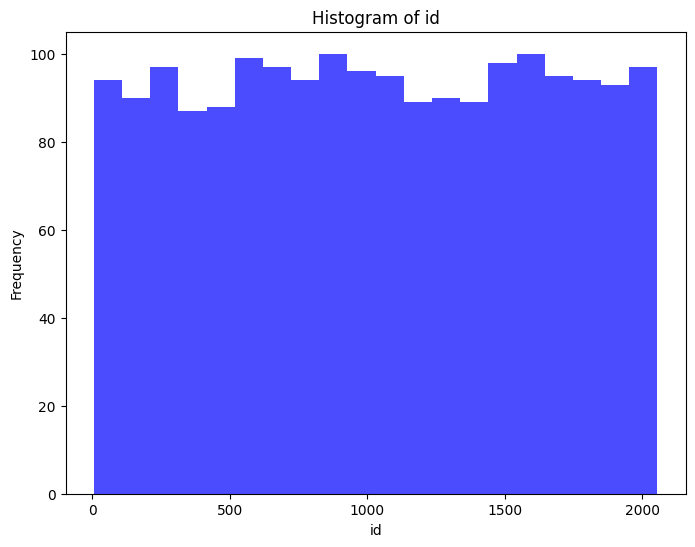

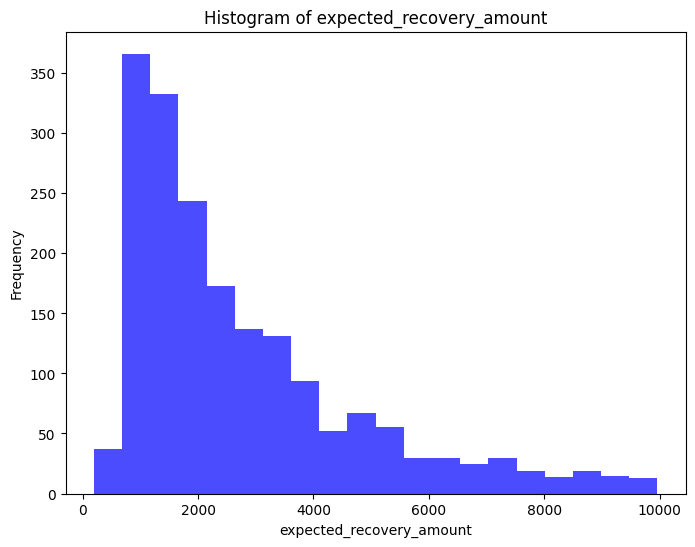

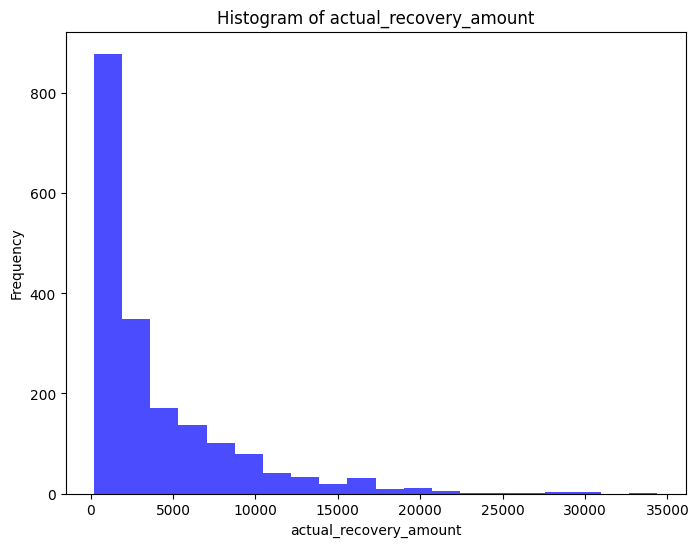

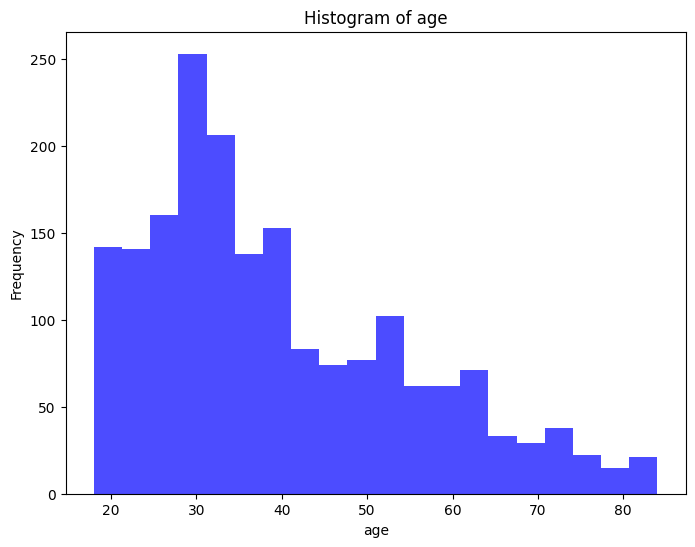

In [86]:
for column in BM_num.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(BM_num[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Bar Plots:**
Visualize the frequency distribution using bar plots:

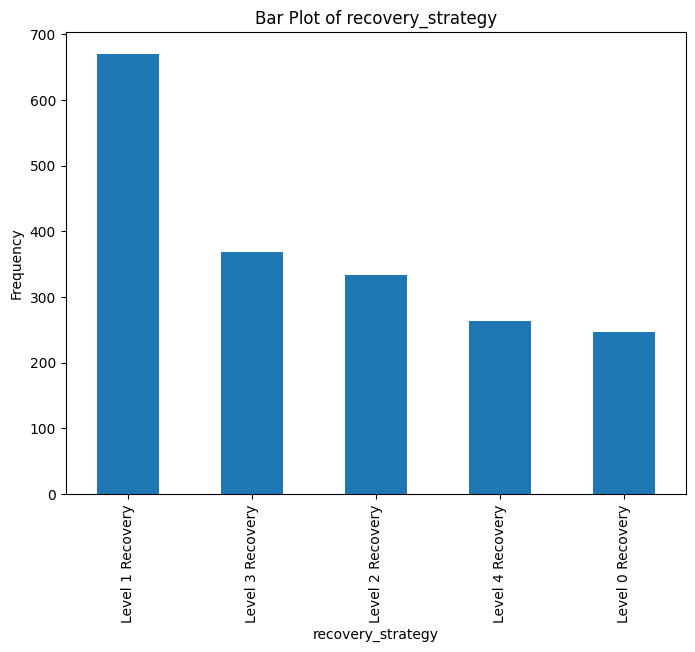

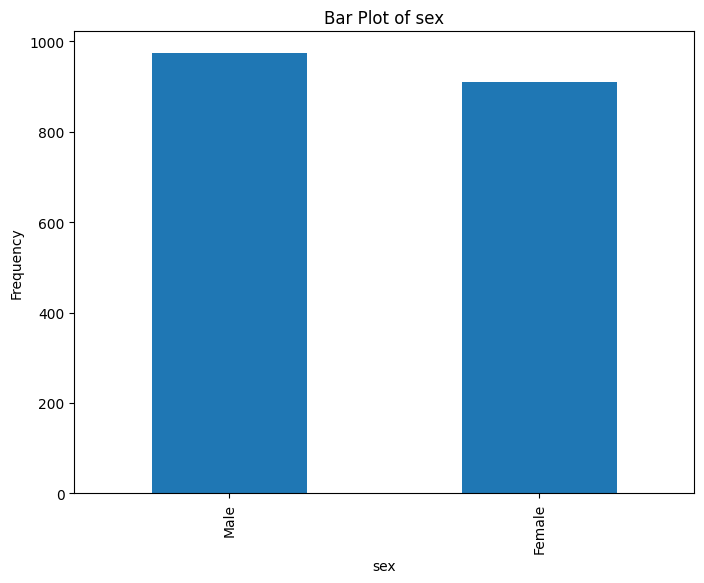

In [87]:
for column in BM_cat.columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

**Pie Charts:**


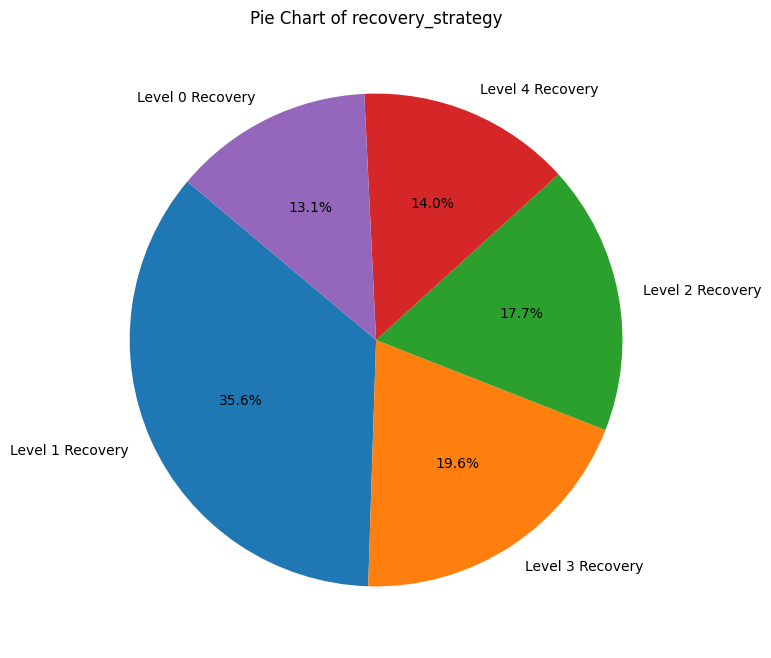

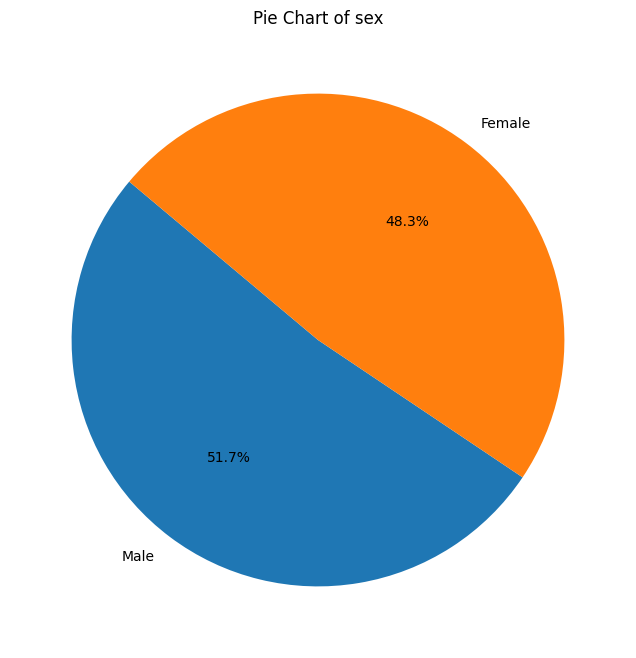

In [88]:
for column in BM_cat.columns:
    value_counts = data[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column}')
    plt.show()

**Bivariate analysis**

In [89]:
# Bivariate analysis for Categorical vs. Categorical Variables
for category in cat:
    if category != 'recovery_strategy':
        contingency_table = pd.crosstab(BM_cat[category], BM_cat['recovery_strategy'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-squared test results for {category} vs. recovery_strategy:")
        print("Chi2:", chi2)
        print("P-value:", p)

Chi-squared test results for sex vs. recovery_strategy:
Chi2: 4.365965373319539
P-value: 0.3587376356139677


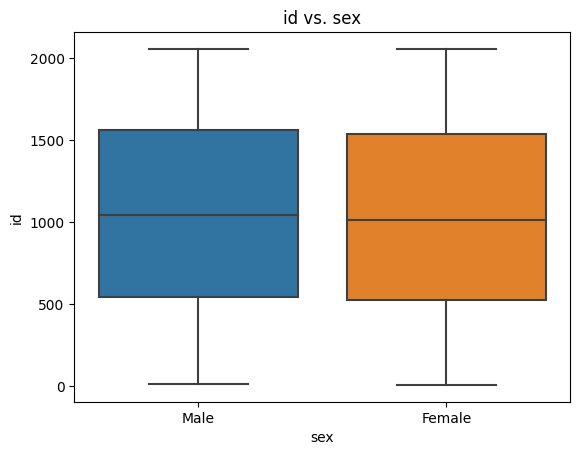

One-way ANOVA results for id vs. sex:
F-statistic: 0.5821353282178314
P-value: 0.4455722797794599


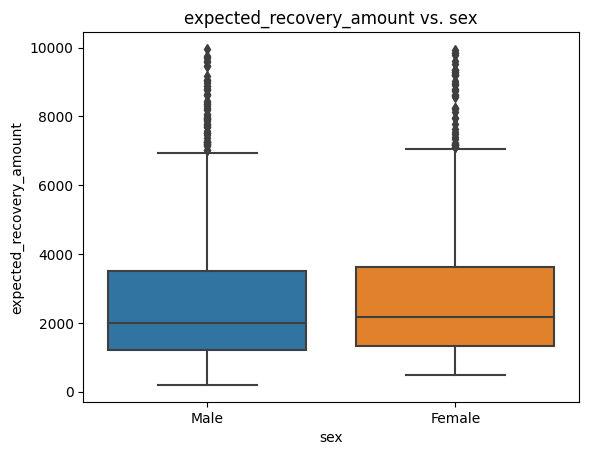

One-way ANOVA results for expected_recovery_amount vs. sex:
F-statistic: 0.868231981229856
P-value: 0.3515648778751943


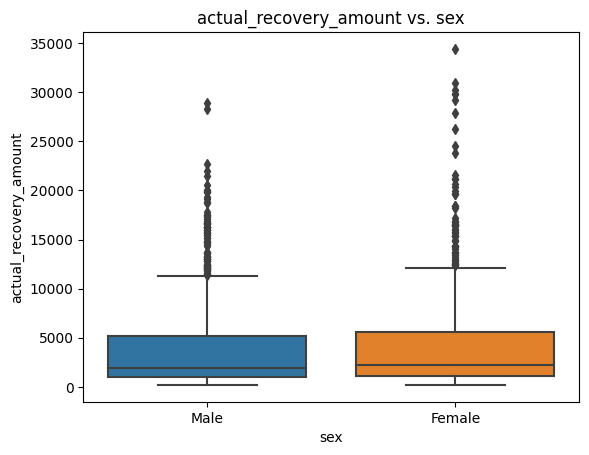

One-way ANOVA results for actual_recovery_amount vs. sex:
F-statistic: 2.090062031130109
P-value: 0.14842672350902122


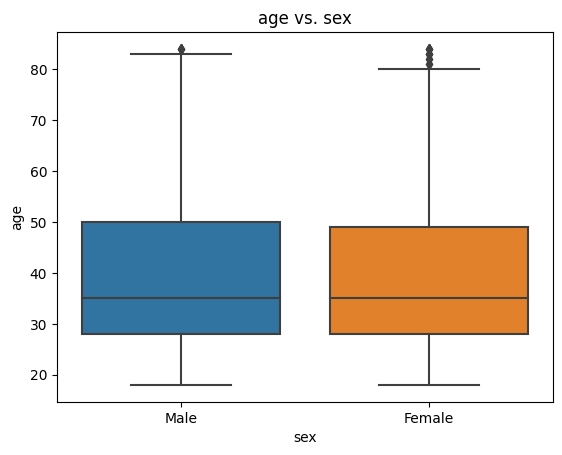

One-way ANOVA results for age vs. sex:
F-statistic: 0.5355558772844421
P-value: 0.46437158499978737


In [90]:
# Bivariate analysis for Numeric vs. Categorical Variables
for numeric_column in num:
    for category in cat:
        if category != 'recovery_strategy':
            sns.boxplot(x=BM_cat[category], y=BM_num[numeric_column])
            plt.title(f"{numeric_column} vs. {category}")
            plt.show()

            groups = [BM_num[BM_cat[category] == group][numeric_column] for group in BM_cat[category].unique()]
            f_statistic, p_value = f_oneway(*groups)
            print(f"One-way ANOVA results for {numeric_column} vs. {category}:")
            print("F-statistic:", f_statistic)
            print("P-value:", p_value)

**Multivariate Analysis**

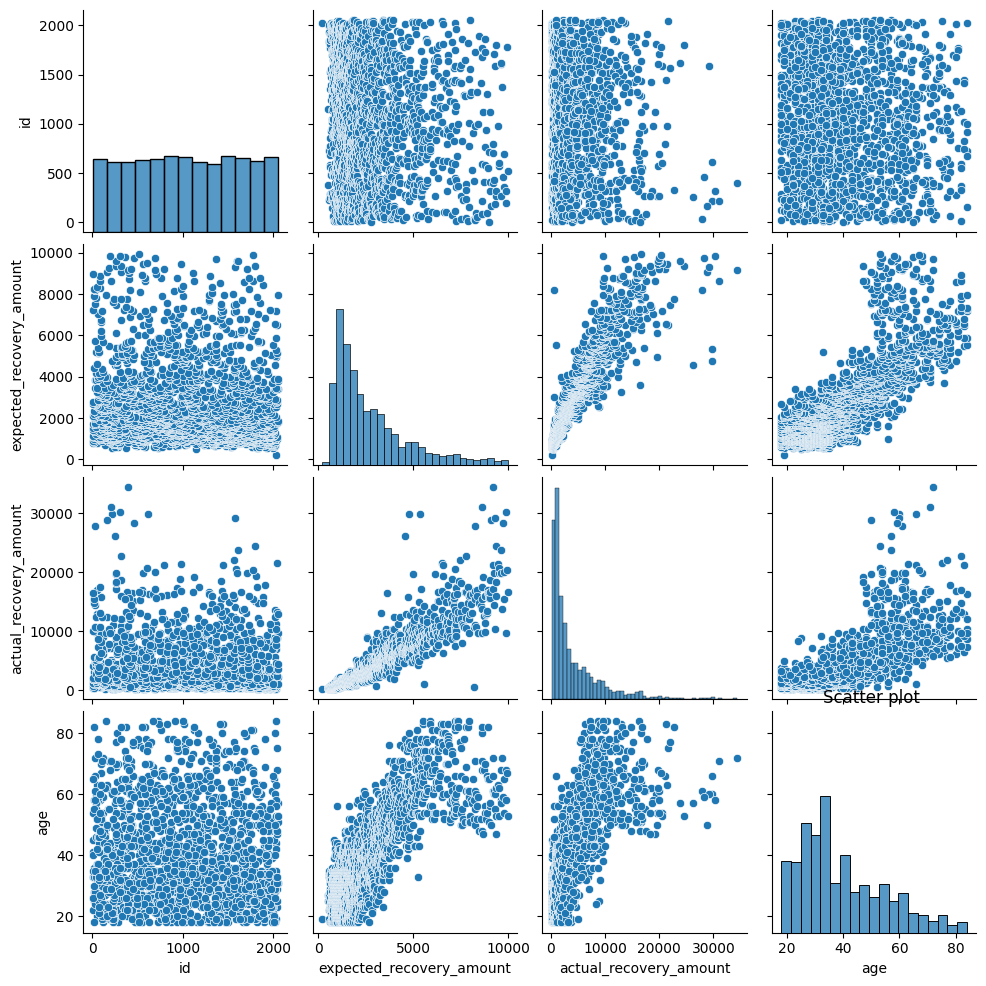

In [91]:
# Pairwise scatter plots for numeric variables
sns.pairplot(BM_num)
plt.title("Scatter plot ")
plt.show()

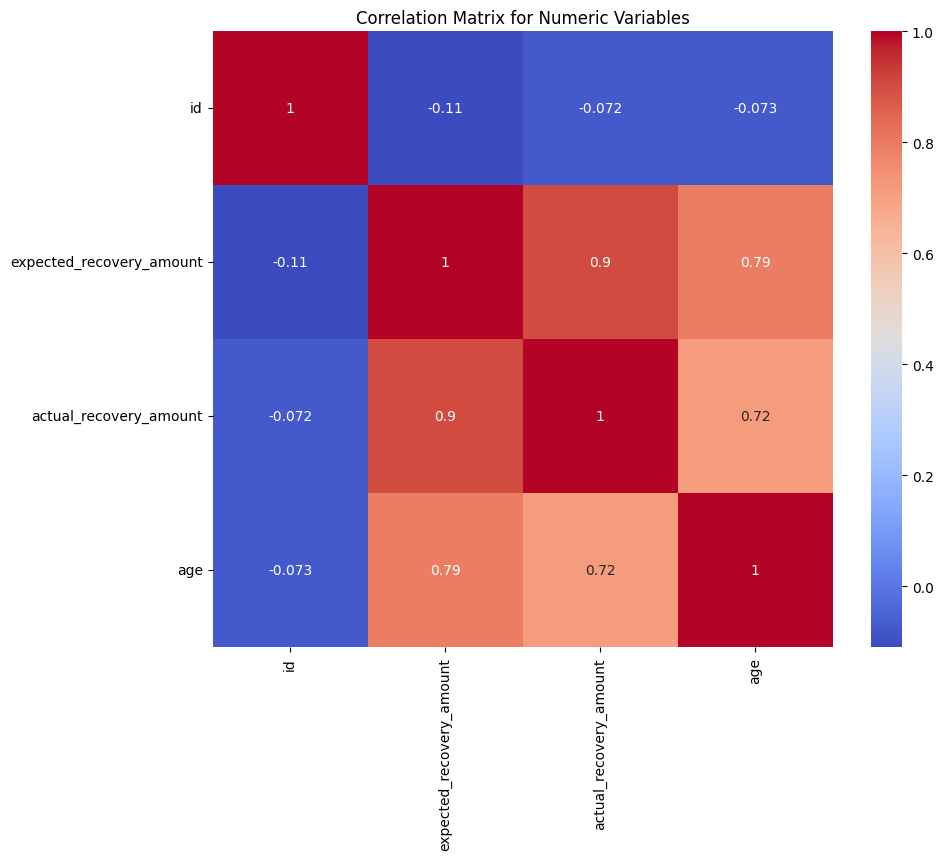

In [92]:
# Correlation matrix heatmap for numeric variables
corr_matrix = BM_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numeric Variables")
plt.show()




---



---


**Graphical exploratory data analysis**

---



---



Levels and thresholds :</p>
<ul>
<li>Level 0: Expected recovery amounts &gt;\$0 and &lt;=\$1000</li>
<li>Level 1: Expected recovery amounts &gt;\$1000 and &lt;=\$2000</li>
<li>The threshold of \$1000 separates Level 0 from Level 1</li>

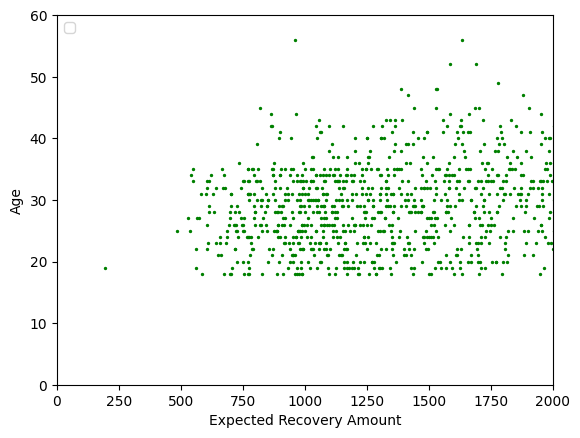

In [93]:
plt.scatter(x=data['expected_recovery_amount'], y=data['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc=2)
plt.show()




---



---


**Statistical test:  age vs. expected recovery amount**


---



---


**Two-sample t-test**

In [94]:
from scipy import stats

# Compute average age just below and above the threshold
era_900_1100 = data.loc[(data['expected_recovery_amount'] < 1100) &
                      (data['expected_recovery_amount'] >= 900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     89.000000
       Level 1 Recovery     94.000000
mean   Level 0 Recovery     27.224719
       Level 1 Recovery     28.755319
std    Level 0 Recovery      6.399135
       Level 1 Recovery      5.859807
min    Level 0 Recovery     18.000000
       Level 1 Recovery     18.000000
25%    Level 0 Recovery     23.000000
       Level 1 Recovery     24.000000
50%    Level 0 Recovery     26.000000
       Level 1 Recovery     29.000000
75%    Level 0 Recovery     31.000000
       Level 1 Recovery     33.000000
max    Level 0 Recovery     56.000000
       Level 1 Recovery     43.000000
dtype: float64

In [95]:
# Perform two-sample t-test
Level_0_age = era_900_1100.loc[data['recovery_strategy'] == "Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[data['recovery_strategy'] == "Level 1 Recovery"]['age']
t_stat, p_value = stats.ttest_ind(Level_0_age, Level_1_age)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -1.6888055955231507
P-value: 0.09297868115283911


**Kruskal-Wallis test**

In [96]:
# Compute average age just below and above the threshold
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) &
                      (data['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

       recovery_strategy
count  Level 0 Recovery     89.000000
       Level 1 Recovery     94.000000
mean   Level 0 Recovery     27.224719
       Level 1 Recovery     28.755319
std    Level 0 Recovery      6.399135
       Level 1 Recovery      5.859807
min    Level 0 Recovery     18.000000
       Level 1 Recovery     18.000000
25%    Level 0 Recovery     23.000000
       Level 1 Recovery     24.000000
50%    Level 0 Recovery     26.000000
       Level 1 Recovery     29.000000
75%    Level 0 Recovery     31.000000
       Level 1 Recovery     33.000000
max    Level 0 Recovery     56.000000
       Level 1 Recovery     43.000000
dtype: float64

In [97]:
# Perform Kruskal-Wallis test
Level_0_age = era_900_1100.loc[data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

**Test Statistic (3.457)**:
<ul>A test statistic of 3.457 indicates that there is some difference in the
medians of the age variable between the recovery strategy groups.</ul>



---



---




**Statistical test:  sex vs. expected recovery amount**


---



---



Developing cross-tabs as well as doing chi-square tests of the percentage of customers that are male vs female will be suitable.

**Cross Table**

In [98]:
# Number of customers in each category
crosstab = pd.crosstab(data.loc[(data['expected_recovery_amount']<1100) &
                              (data['expected_recovery_amount']>=900)]['recovery_strategy'],
                       data['sex'])
print(crosstab)


sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


**Chi-square test**

In [99]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(p_val)

0.5377947810444592




---



---


**Exploratory graphical analysis: recovery amount**


---



---



A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $900 to $1100. This range covers Levels 0 and 1.

 A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.

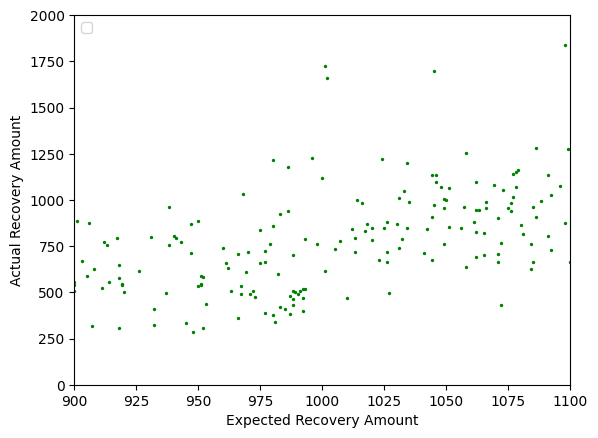

In [100]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.scatter(x=data['expected_recovery_amount'], y=data['actual_recovery_amount'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)
plt.show()

**Heatmap**

In [101]:
# Create a pivot table for heatmap
pivot_table = data.pivot_table(values='actual_recovery_amount',
                             index=pd.cut(data['expected_recovery_amount'], bins=[900, 950, 1000, 1050, 1100]),
                             columns='recovery_strategy', aggfunc=np.mean)

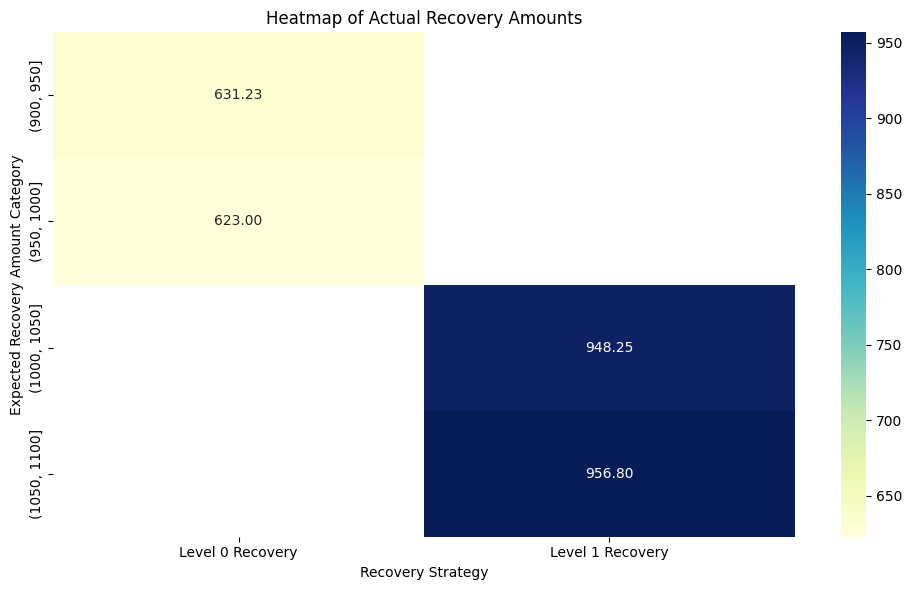

In [102]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel("Recovery Strategy")
plt.ylabel("Expected Recovery Amount Category")
plt.title("Heatmap of Actual Recovery Amounts")
plt.tight_layout()
plt.show()

The heatmap shows the clear understanding of the Recovery and Expected Recovery Amount with range covers Levels 0 and 1.



---



---


**Statistical analysis: recovery amount**

---


---





<p>We'll analyze the discontinuity above the
$1000 recovery threshold using statistical tests.

Two windows, $900-$1100 and $950-$1050, will be examined for consistency. Utilizing the Kruskal-Wallis test, we'll compare average recovery amounts just below and above the threshold in each window to determine potential differences.</p>

In [103]:
by_recovery_strategy['actual_recovery_amount'].describe().unstack()


       recovery_strategy
count  Level 0 Recovery       89.000000
       Level 1 Recovery       94.000000
mean   Level 0 Recovery      623.017022
       Level 1 Recovery      955.825551
std    Level 0 Recovery      211.620859
       Level 1 Recovery      293.732434
min    Level 0 Recovery      282.855000
       Level 1 Recovery      433.199166
25%    Level 0 Recovery      491.425000
       Level 1 Recovery      777.705154
50%    Level 0 Recovery      575.435000
       Level 1 Recovery      907.271525
75%    Level 0 Recovery      762.995000
       Level 1 Recovery     1060.334387
max    Level 0 Recovery     1225.660000
       Level 1 Recovery     2053.290126
dtype: float64

In [104]:
# Perform Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual)

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)

In [105]:
# Repeat for a smaller range of $950 to $1050
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) &
                      (data['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)




---



---



**Regression modeling: no threshold**


---



---






<p>We now want to take a regression-based approach to estimate the program impact at the \$1000 threshold using data that is just above and below the threshold. </p>
<p>We will build two models. The first model does not have a threshold while the second will include a threshold.</p>
<p>The first model predicts the actual recovery amount (dependent variable) as a function of the expected recovery amount (independent variable). We expect that there will be a strong positive relationship between these two variables.  </p>
<p>We will examine the adjusted R-squared to see the percent of variance explained by the model.  In this model, we are not representing the threshold but simply seeing how the variable used for assigning the customers (expected recovery amount) relates to the outcome variable (actual recovery amount).</p>

In [106]:
# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

In [107]:
# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)


In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Mon, 21 Aug 2023   Prob (F-statistic):           1.12e-07
Time:                            05:27:14   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



---



---




**Regression modeling: adding true threshold**


---



---


<p>From the first model, we see that the expected recovery amount's regression coefficient is statistically significant. </p>
<p>The second model adds an indicator of the true threshold to the model (in this case at \$1000).  </p>
<p>We will create an indicator variable (either a 0 or a 1) that represents whether or not the expected recovery amount was greater than \$1000. When we add the true threshold to the model, the regression coefficient for the true threshold represents the additional amount recovered due to the higher recovery strategy.  That is to say, the regression coefficient for the true threshold measures the size of the discontinuity for customers just above and just below the threshold.</p>
<p>If the higher recovery strategy helped recovery more money, then the regression coefficient of the true threshold will be greater than zero.  If the higher recovery strategy did not help recovery more money, then the regression coefficient will not be statistically significant.</p>

In [109]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
data['indicator_1000'] = np.where(data['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) &
                      (data['expected_recovery_amount']>=900)]

In [110]:
# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

In [111]:
# Build linear regression model
model = sm.OLS(y,X).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Mon, 21 Aug 2023   Prob (F-statistic):           1.83e-15
Time:                            05:22:22   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



---



---


**Regression modeling: adjusting the window**


---



---


<p>The regression coefficient for the true threshold was statistically significant with an estimated impact of around \$278.  This is much larger than the \$50 per customer needed to run this higher recovery strategy. </p>
<p>Before showing this to our manager, we want to convince ourselves that this result wasn't due to choosing an expected recovery amount window of \$900 to \$1100. Let's repeat this analysis for the window from \$950 to \$1050 to see if we get similar results.</p>
<p>The answer? Whether we use a wide (\$900 to \$1100) or narrower window (\$950 to \$1050), the incremental recovery amount at the higher recovery strategy is much greater than the \$50 per customer it costs for the higher recovery strategy.  So we conclude that the higher recovery strategy is worth the extra cost of \$50 per customer.</p>

In [113]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = data.loc[(data['expected_recovery_amount']<1050) &
                      (data['expected_recovery_amount']>=950)]


In [114]:
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

In [115]:
# Build linear regression model
model = sm.OLS(y,X).fit()

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Mon, 21 Aug 2023   Prob (F-statistic):           1.12e-07
Time:                            05:22:22   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""